In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
vid = 'D:\\Open Field Behavior\Test 520 - 9 mth - WT - NULL - 3047.mp4'

In [3]:
cam = cv2.VideoCapture(vid) 
  
try: 
      
    # creating a folder named data 
    if not os.path.exists('data'): 
        os.makedirs('data') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 
  
# frame 
currentframe = 0
  
while(True): 
      
    # reading from frame 
    ret,frame = cam.read() 
  
    if ret: 
        # if video is still left continue creating images 
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        # writing the extracted images 
        cv2.imwrite(name, frame) 
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
        break
    else: 
        break
  
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 

Creating..../data/frame0.jpg


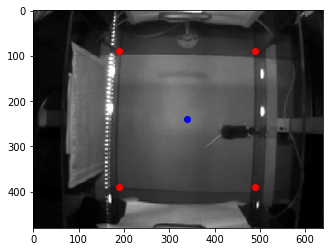

In [4]:
img = cv2.imread('data/frame0.jpg')
plt.imshow(img)
plt.plot(190, 390, 'ro')
plt.plot(190, 90, 'ro')
plt.plot(490, 90, 'ro')
plt.plot(490, 390, 'ro')
plt.plot((190+490)/2, (390+90)/2, 'bo')

In [5]:
center = ((190+490)/2, (390+90)/2)

In [6]:
os.listdir('D:\\Open field behavior\plot-poses\Test 520 - 9 mth - WT - NULL - 3047\kalman_filter_smoothing_plot_center_back.npy')

NotADirectoryError: [WinError 267] The directory name is invalid: 'D:\\Open field behavior\\plot-poses\\Test 520 - 9 mth - WT - NULL - 3047\\kalman_filter_smoothing_plot_center_back.npy'

In [7]:
positions = np.load('D:\\Open field behavior\plot-poses\Test 523 - 9 mth - HET - NULL - 3063\kalman_filter_smoothing_plot_center_back.npy')

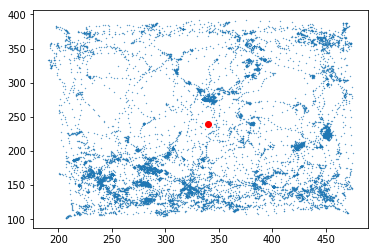

In [8]:
plt.scatter(positions[:, 0], positions[:, 2], .1)
plt.plot(center[0], center[1], 'ro')
plt.show()

In [9]:
os.listdir('D:\\Open field behavior\plot-poses')

['ambulation_test_plots',
 'anypose_dlc_comparison.pdf',
 'average_speed.csv',
 'average_velocity.csv',
 'data-bargraph.pdf',
 'diff_means_pvalue.pdf',
 'diff_sample size_pvalue.pdf',
 'distance_histogram.png',
 'distance_traveled.pdf',
 'final_csv',
 'num_epochs.pdf',
 'num_rearings.pdf',
 'p-vals-mann-whitney.csv',
 'rearing_test_plots',
 'smoothed-data-bargraph.pdf',
 'smoothed_anypose_dlc_comparison.pdf',
 'statistic-mann-whitney.csv',
 'Test 520 - 9 mth - WT - NULL - 3047',
 'Test 521 - 9 mth - WT - NULL - 3045',
 'Test 522 - 9 mth - HET - NULL - 3078',
 'Test 523 - 9 mth - HET - NULL - 3063',
 'Test 524 - 9 mth - HET - ZFP - 3073',
 'Test 525 - 9 mth - HET - ZFP - 3071',
 'Test 526 - 9 mth - WT - NULL - 2424',
 'Test 527 - 9 mth - WT - NULL - 2436',
 'Test 528 - 9 mth - WT - NULL - 2408',
 'Test 529 - 9 mth - HET - ZFP - 3044',
 'Test 530 - 9 mth - HET - ZFP - 3064',
 'Test 531 - 9 mth - HET - ZFP - 3065',
 'Test 532 - 9 mth - HET - NULL - 2453',
 'Test 533 - 9 mth - HET - NULL -

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np





center = ((190+490)/2, (390+90)/2)
start = 0; end = 15
plot_poses = 'D:\Open field behavior\plot-poses\\'
dist_from_center = {'WT-NULL': {9: [], 18: []}, 'HET-NULL': {9: [], 18: []}, 'HET-ZFP': {9: [], 18: []}}
from tqdm import tqdm
def distance_between_two_points(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2) * (4/31)


for folder in tqdm(os.listdir(plot_poses)):
    mouse_folder = folder
    if 'Test' not in folder:
        continue
    folder = plot_poses + folder
    smoothed_center_back = np.load(folder + '/kalman_filter_smoothing_plot_center_back.npy')
    
    smoothed_cb_x = smoothed_center_back[:,0]
    smoothed_cb_y = smoothed_center_back[:,2]
    
    
    control = mouse_folder.split('mth -')[1][:11].replace(' ', '')
    if control[-1] == '-':
        control = control[:-1]
    month = int(mouse_folder.split('mth')[0][-3:])
    fps = len(smoothed_cb_x) // (15*60)
    
    distances = []
    for i in range(start*60*fps, end*60*fps):
        cb_position = smoothed_center_back[i, [0,2]] # (x,y) of center back
        distances.append(distance_between_two_points(cb_position[0], cb_position[1], center[0], center[1]))
    dist_from_center[control][month].append(np.average(distances))

100%|████████████████████████████████████████████████████████████████████████████████| 102/102 [00:09<00:00, 10.93it/s]


In [14]:
import pandas as pd
datasets = [dist_from_center]
names = ["Average Distance From Center"]

time = str(start) + '-' + str(end)
for idx in range(len(datasets)):
    dict_to_df = {'Genotype': [], 'Metric': []}
    dic = datasets[idx]
    print(names[idx])
    for key in dic: 
        
        for key2 in dic[key]:
            geno = key + ": " + str(key2) + " Month"
            for dat in dic[key][key2]:
                dict_to_df['Genotype'].append(geno)
                dict_to_df['Metric'].append(dat)
    df = pd.DataFrame.from_dict(dict_to_df)
    print(plot_poses + 'final_csv\\' + names[idx] + "_" + time + ".csv")
    df.to_csv(plot_poses + 'final_csv\\' + names[idx] + "_" + time + ".csv")

Average Distance From Center
D:\Open field behavior\plot-poses\final_csv\Average Distance From Center_0-15.csv


  0%|                                                                                          | 0/102 [00:00<?, ?it/s]

Test 520 - 9 mth - WT - NULL - 3047


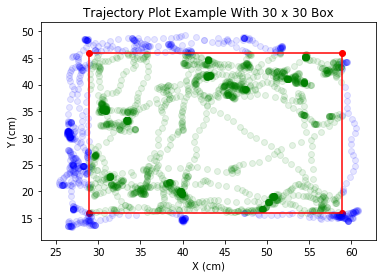

 17%|█████████████▌                                                                   | 17/102 [00:10<00:50,  1.70it/s]


In [52]:
center = ((190+490)/2, (390+90)/2)
start = 2; end = 5
plot_poses = 'D:\Open field behavior\plot-poses\\'
time_spent_in_box = {'WT-NULL': {9: [], 18: []}, 'HET-NULL': {9: [], 18: []}, 'HET-ZFP': {9: [], 18: []}}
from tqdm import tqdm
def distance_between_two_points(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2) * (4/31)
count = 0

for folder in tqdm(os.listdir(plot_poses)):
    mouse_folder = folder
    if 'Test' not in folder:
        continue
    folder = plot_poses + folder
    smoothed_center_back = np.load(folder + '/kalman_filter_smoothing_plot_center_back.npy')
    
    smoothed_cb_x = smoothed_center_back[:,0]
    smoothed_cb_y = smoothed_center_back[:,2]
    
    
    control = mouse_folder.split('mth -')[1][:11].replace(' ', '')
    if control[-1] == '-':
        control = control[:-1]
    month = int(mouse_folder.split('mth')[0][-3:])
    fps = len(smoothed_cb_x) // (15*60)
    upper_right = (np.array(center) * (4/31) + 15)#* (4/31)
    lower_left = (np.array(center)* (4/31) - 15)#* (4/31)
    lower_right = ((lower_left[0] + 30) , lower_left[1])
    upper_left = ((upper_right[0] - 30), upper_right[1])
    
    plt.scatter(upper_left[0], upper_left[1], label = 'Border', color = 'red')
    plt.scatter(upper_right[0], upper_right[1], color = 'red')
    plt.scatter(lower_right[0], lower_right[1], color = 'red')
    plt.scatter(lower_left[0], lower_left[1], color = 'red')
    plt.plot([upper_left[0], lower_left[0]], [upper_left[1], lower_left[1]], color = 'red')
    plt.plot([upper_left[0], upper_right[0]], [upper_left[1], upper_right[1]], color = 'red')
    plt.plot([lower_left[0], lower_right[0]], [lower_left[1], lower_right[1]], color = 'red')
    plt.plot([upper_right[0], lower_right[0]], [upper_right[1], lower_right[1]], color = 'red')
    
    #plt.scatter(smoothed_cb_x * (4/31), smoothed_cb_y * (4/31), alpha = .01)
    
    time_in_box = 0
    x_bottom = lower_left[1]
    x_top = upper_left[1]
    y_left = lower_left[0]
    y_right = lower_right[0]
    #print('x_bottom: {}, y_right: {}, x_top: {}, y_left:{}'.format(x_bottom, y_left, x_top, y_right))
    label_counter = 2
    labels = []
    print(mouse_folder)
    for i in range(start*60*fps, end*60*fps):
        cb_position = smoothed_center_back[i, [0,2]] *(4/31)# (x,y) of center back

        
        in_box = False
        if cb_position[1] < x_top and cb_position[1] > x_bottom:
            if cb_position[0] > y_left and cb_position[0] < y_right:
                in_box = True
                
        #print(in_box)
        color = 'green' if in_box else 'blue'
        if in_box:
            time_in_box += 1
        #label = 'In Box' if in_box else 'Out of Box'
        #labels = list(labels)
        #labels.append(label)
        #label = set(labels)
        #if len(labels) == 2: 
        label = ''
        plt.scatter(cb_position[0], cb_position[1] , alpha = .1, color = color)
        
        
    
    time_spent_in_box[control][month].append(time_in_box/fps)
    plt.xlabel('X (cm)')
    plt.ylabel('Y (cm)')
    plt.title('Trajectory Plot Example With 30 x 30 Box')
    plt.savefig('30x30_box.pdf')
    
    plt.show()
    break
    #dist_from_center[control][month].append(np.average(distances))

In [46]:
import pandas as pd
datasets = [time_spent_in_box]
names = ["Time Spent In Box 30x30"]

time = str(start) + '-' + str(end)
for idx in range(len(datasets)):
    dict_to_df = {'Genotype': [], 'Metric': []}
    dic = datasets[idx]
    print(names[idx])
    for key in dic: 
        
        for key2 in dic[key]:
            geno = key + ": " + str(key2) + " Month"
            for dat in dic[key][key2]:
                dict_to_df['Genotype'].append(geno)
                dict_to_df['Metric'].append(dat)
    df = pd.DataFrame.from_dict(dict_to_df)
    print(plot_poses + 'final_csv\\' + names[idx] + "_" + time + ".csv")
    df.to_csv(plot_poses + 'final_csv\\' + names[idx] + "_" + time + ".csv")

Time Spent In Box 30x30
D:\Open field behavior\plot-poses\final_csv\Time Spent In Box 30x30_2-5.csv


In [37]:
time_spent_in_box

{'WT-NULL': {9: [1.9411764705882353,
   1.7647058823529411,
   0.8823529411764706,
   3.4705882352941178,
   2.411764705882353,
   4.294117647058823,
   6.294117647058823,
   2.176470588235294,
   4.647058823529412,
   3.5294117647058822,
   2.9411764705882355,
   0.11764705882352941],
  18: [1.5294117647058822,
   0.47058823529411764,
   0.9411764705882353,
   3.411764705882353,
   5.647058823529412,
   0.3448275862068966,
   0.0,
   3.206896551724138,
   2.1724137931034484,
   3.413793103448276,
   2.1379310344827585,
   1.3793103448275863]},
 'HET-NULL': {9: [3.0,
   1.588235294117647,
   10.470588235294118,
   2.5294117647058822,
   1.8823529411764706,
   4.823529411764706,
   10.705882352941176,
   4.588235294117647,
   1.6470588235294117,
   3.823529411764706,
   1.0],
  18: [3.4705882352941178,
   2.7058823529411766,
   1.2941176470588236,
   0.7647058823529411,
   3.7586206896551726,
   13.482758620689655,
   8.310344827586206,
   4.862068965517241,
   0.13793103448275862,
   2